In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Wgranie danych i podstawowe metryki

In [2]:
df = pd.read_csv('df.csv')
df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'])
df


,date,copper_price,buy_price,global_consumer_price_index,six_month_demand,gold_price,inventory
0,2020-01-01,3.137096,2.661115,117.999071,30.943593,2345.428509,11.721919
1,2020-02-01,3.080626,2.601521,121.141858,39.010606,2339.954887,34.574074
2,2020-03-01,3.116939,2.596875,122.787487,37.089984,1915.409552,28.794901
3,2020-04-01,3.180225,2.717195,124.483782,39.637642,2119.374158,40.498696
4,2020-05-01,3.220652,2.707316,121.855462,31.061250,2113.274844,34.927412
...,...,...,...,...,...,...,...
95,2027-12-01,3.510925,3.032640,196.290341,47.405890,2348.688526,22.279791
96,2028-01-01,3.397751,2.905826,197.409496,49.262588,2034.178653,6.486046
97,2028-02-01,3.251829,2.763559,199.246402,52.169598,1842.176256,46.331669
98,2028-03-01,3.259828,2.796132,199.289260,51.048567,2224.503966,39.992547


In [3]:
#df['gold_price'] = df['gold_price'] / 1000
#df

In [4]:
df.isna().sum()

date                           0
copper_price                   0
buy_price                      0
global_consumer_price_index    0
six_month_demand               0
gold_price                     0
inventory                      0
dtype: int64

In [5]:
df.shape

(100, 7)

In [6]:
df_without_date = df.drop(columns=['date'])
df_without_date.describe()

,copper_price,buy_price,global_consumer_price_index,six_month_demand,gold_price,inventory
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.224293,2.722543,159.989632,34.914723,2087.926152,28.700803
std,0.275635,0.275799,23.512718,9.555565,178.331839,11.567952
min,2.654811,2.145191,117.999071,11.625787,1802.154844,3.505353
25%,3.066623,2.571619,139.976578,27.905697,1933.797925,21.728733
50%,3.251567,2.749005,159.399685,34.725549,2094.859819,29.972672
75%,3.368083,2.881985,179.810986,41.643890,2248.064183,36.084329
max,3.906448,3.408610,199.289260,55.510056,2386.981577,55.818895


In [7]:
df_without_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   copper_price                 100 non-null    float64
 1   buy_price                    100 non-null    float64
 2   global_consumer_price_index  100 non-null    float64
 3   six_month_demand             100 non-null    float64
 4   gold_price                   100 non-null    float64
 5   inventory                    100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB


## Wizualizacja danych

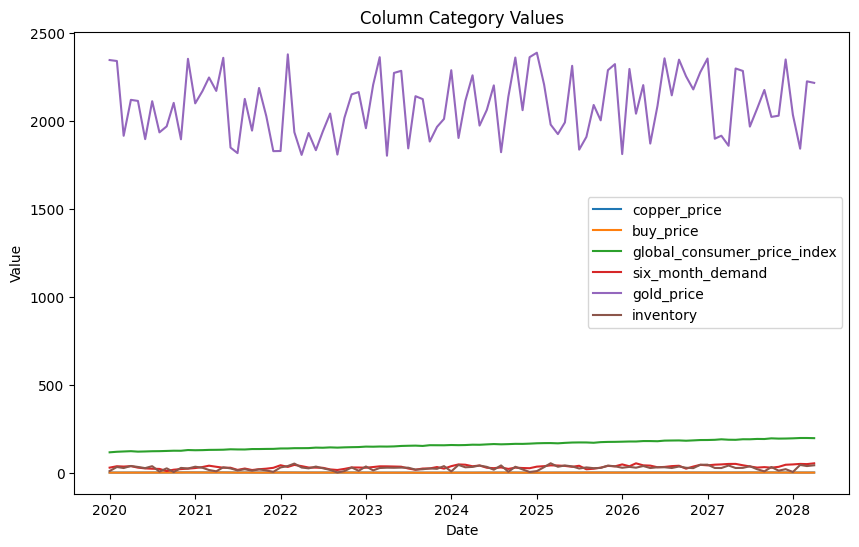

In [8]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot each column category value
for column in df.columns:
    if column != 'date':
        plt.plot(df['date'], df[column], label=column)

# Set the title and labels
plt.title('Column Category Values')
plt.xlabel('Date')
plt.ylabel('Value')

# Add a legend
plt.legend()

# Show the plot
plt.show()

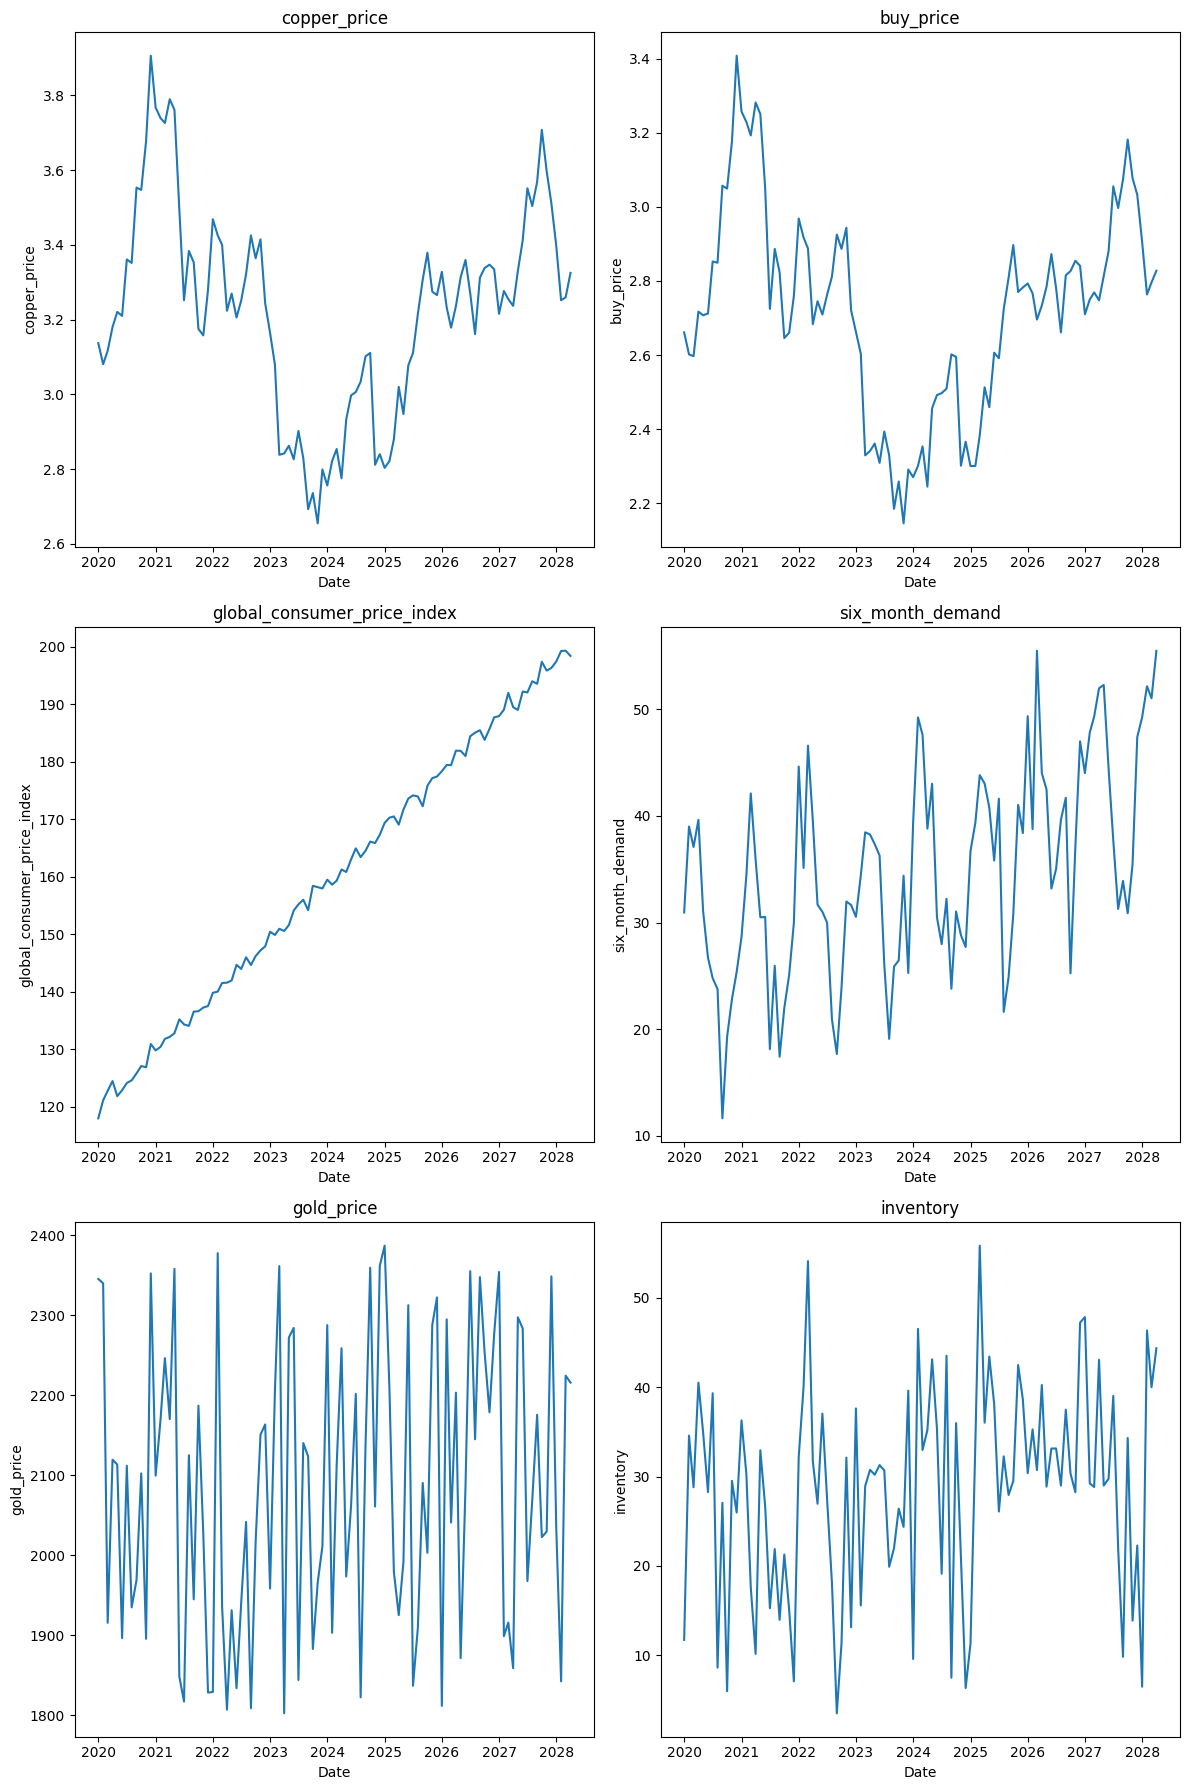

In [9]:
# Set the figure size
plt.figure(figsize=(12, 18))

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Iterate over the columns and create subplots
for i, column in enumerate(df.columns):
    if column != 'date':
        # Create a new subplot
        plt.subplot(num_rows, num_cols, i)
        
        # Plot the column values against the date
        plt.plot(df['date'], df[column])
        
        # Set the title and labels
        plt.title(column)
        plt.xlabel('Date')
        plt.ylabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [18]:
X = df_without_date[['copper_price', 'buy_price', 'global_consumer_price_index', 'gold_price', 'inventory']]
y = df_without_date['six_month_demand']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap
shap.initjs()

# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stworzenie modelu regresji RandomForest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Trening modelu regresyjnego
rf_regressor.fit(X_train, y_train)

# Predykcje na zbiorze testowym
y_pred = rf_regressor.predict(X_test)

# Ewaluacja modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

importances = rf_regressor.feature_importances_
print(importances)

d:\Dane\Dokumenty\Python\ZadankoMartyRekrutacja\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Mean Squared Error: 16.40
R-squared: 0.73
[0.09365523 0.08368616 0.38362252 0.1465504  0.29248569]


In [12]:
explainer = shap.Explainer(rf_regressor)
shap_values = explainer.shap_values(X_test)

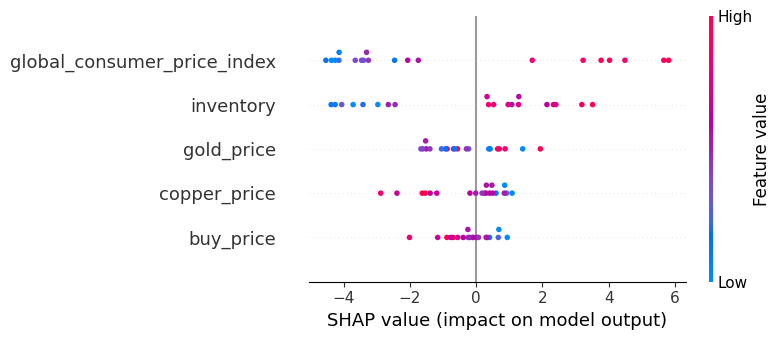

In [13]:
shap.summary_plot(shap_values, X_test)

In [14]:
correlation = df_without_date.corr()
print(correlation['six_month_demand'].sort_values(ascending=False))


six_month_demand               1.000000
global_consumer_price_index    0.547820
inventory                      0.473308
gold_price                     0.102640
buy_price                     -0.079522
copper_price                  -0.083283
Name: six_month_demand, dtype: float64


In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Instantiate RFE with the model
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Check the ranking of features
ranking = rfe.ranking_
print(ranking)


[1 2 4 5 3]


In [16]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Instantiate the model with a regularization parameter alpha
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Check the coefficients
print(lasso.coef_)

[-0.         -0.          0.18451649  0.00262439  0.30131998]


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
print(importances)


[0.08913846 0.0725034  0.39375469 0.14787373 0.29672973]
